# **Proyek Analisis Data: E-Commerce Public Dataset**

##**Data Diri**

###Nama: Nurul Nyi Qoniah
###Email: nurulqoniah313@gmail.com
###Username: nurqoneah


## **Menentukan Pertanyaan Bisnis**

*   Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
*   Produk apa yang paling banyak dan paling sedikit terjual?
*   Bagaimana demografi pelanggan yang kita miliki?
*   Bagaimana tingkat kepuasan pelanggan?
*   Bagaimana pola pembayaran yang paling umum digunakan oleh pelanggan?
*   Bagaimana performa penjualan setiap seller?









## **Menyiapkan semua library yang dibutuhkan**

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.pyplot as plt
!pip install cartopy
!pip install unidecode
import unidecode
import cartopy.crs as ccrs

## **Data Wrangling**

### **Gathering Data**





In [2]:
#dataset customer
customers_df = pd.read_csv('/content/sample_data/dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
#dataset geolocation
geolocation_df = pd.read_csv('/content/sample_data/dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
#dataset order item
order_item_df = pd.read_csv('/content/sample_data/dataset/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
#dataset order payment
order_payment_df = pd.read_csv('/content/sample_data/dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
#dataset order review
order_review_df = pd.read_csv('/content/sample_data/dataset/order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
#dataset order
order_df = pd.read_csv('/content/sample_data/dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
#dataset product category
product_category_df = pd.read_csv('/content/sample_data/dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
#dataset product
product_df = pd.read_csv('/content/sample_data/dataset/products_dataset.csv')
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#dataset seller
seller_df = pd.read_csv('/content/sample_data/dataset/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **Assessing Data**

In [11]:
customers_df.info()
print("\nData null:\n", customers_df.isna().sum())
print("\nJumlah duplikasi: ", customers_df.duplicated().sum())
print('\nData describe customers:\n', customers_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Data null:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top  

In [12]:
geolocation_df.info()
print("\nData null:\n", geolocation_df.isna().sum())
print("\nJumlah duplikasi: ", geolocation_df.duplicated().sum())
print('\nData describe customers:\n', geolocation_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Data null:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi:  261831

Data describe customers:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique        

In [13]:
order_item_df.info()
print("\nData null:\n", order_item_df.isna().sum())
print("\nJumlah duplikasi: ", order_item_df.duplicated().sum())
print('\nData describe customers:\n', order_item_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Data null:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
                                 order_id  order_item_id  \
count                             112650  112650.000000   
u

In [14]:
order_payment_df.info()
print("\nData null:\n", order_payment_df.isna().sum())
print("\nJumlah duplikasi: ", order_payment_df.duplicated().sum())
print('\nData describe customers:\n', order_payment_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Data null:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
                                 order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5

In [15]:
order_review_df.info()
print("\nData null:\n", order_review_df.isna().sum())
print("\nJumlah duplikasi: ", order_review_df.duplicated().sum())
print('\nData describe customers:\n', order_review_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Data null:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
                                review_id                   

In [16]:
order_df.info()
print("\nData null:\n", order_df.isna().sum())
print("\nJumlah duplikasi: ", order_df.duplicated().sum())
print('\nData describe customers:\n', order_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Data null:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_custo

In [17]:
product_category_df.info()
print("\nData null:\n", product_category_df.isna().sum())
print("\nJumlah duplikasi: ", product_category_df.duplicated().sum())
print('\nData describe customers:\n', product_category_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Data null:
 product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top       seguros_e_servicos         security_and_services
freq                       1                             1


In [18]:
product_df.info()
print("\nData null:\n", product_df.isna().sum())
print("\nJumlah duplikasi: ", product_df.duplicated().sum())
print('\nData describe customers:\n', product_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Data null:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g              

In [19]:
seller_df.info()
print("\nData null:\n", seller_df.isna().sum())
print("\nJumlah duplikasi: ", seller_df.duplicated().sum())
print('\nData describe customers:\n', seller_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Data null:
 seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi:  0

Data describe customers:
                                seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     9e25199f6ef7e7c347120ff175652c3b                     NaN   sao paulo   
freq                    

### **Cleaning Data**
*   Menghilangkan duplicate data
*   Menangani missing value
*   Menangani inaccurate value







In [20]:
#order review yang titlenya null
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [21]:
#menghitung tiap title order review
order_review_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
produto com lacre violado      1
Atraso Entrega                 1
Top Show                       1
Foi cancelado                  1
Entregue como prometido        1
Name: review_comment_title, Length: 4527, dtype: int64

In [22]:
#order review yang comment null
order_review_df[order_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [23]:
#menghitung tiap comment order review
order_review_df.review_comment_message.value_counts()

Muito bom                                                    230
Bom                                                          189
muito bom                                                    122
bom                                                          107
Recomendo                                                    100
                                                            ... 
qualidade.                                                     1
chegou bem antes do prazo previsto                             1
Ja respondi esse questionario.                                 1
Produto não informado como paralelo/réplica                    1
Produto um pouço maior do que na imagem, mas ficou legal.      1
Name: review_comment_message, Length: 36159, dtype: int64

In [24]:
#menangani missing value
order_review_df.fillna(value="no comment", inplace=True)

In [25]:
order_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [26]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [27]:
#menangani format date
datetime_order_item = ["shipping_limit_date"]

for column in datetime_order_item:
  order_item_df[column] = pd.to_datetime(order_item_df[column])

In [28]:
#menangani format date
datetime_order_review = ["review_creation_date","review_answer_timestamp"]

for column in datetime_order_review:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

In [29]:
#menangani format date
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_order:
  order_df[column] = pd.to_datetime(order_df[column])

## **Exploratory Data Analysis (EDA)**

## **Explore**

**customer**

In [30]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [31]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [32]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**order_payment**



In [33]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [34]:
order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

**order_review**

In [35]:
order_review_df.describe(include="all")

<ipython-input-35-480cd1badf85>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_review_df.describe(include="all")
<ipython-input-35-480cd1badf85>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_review_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,4548534449b1f572e357211b90724f1b,8e17072ec97ce29f0e1f111e598b0c85,NaN,no comment,no comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [36]:
order_review_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

**order**

In [37]:
delivery_time = order_df["order_delivered_customer_date"] - order_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

<Axes: >

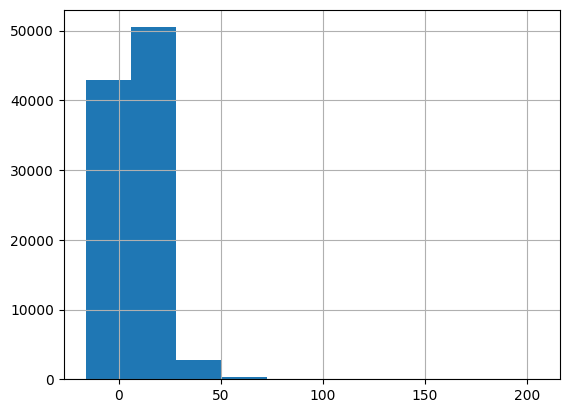

In [38]:
order_df.delivery_time.hist()

In [39]:
customer_id_in_orders_df =  order_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
10311,e0afe6aecb9f6406541ff71b13fd9aa9,45eaea613902ad53c34346788bea6cf7,4726,sao paulo,SP,Active
41220,149a7003c8eda15d72fe457aee6501de,165ac735a2c6601d0e4a491a990d63f0,2469,sao paulo,SP,Active
27858,fa753711fe72433b2d40f06d300f097e,725edaaf9b82ca7fdb9545c3e913f46f,14079,ribeirao preto,SP,Active
4309,cd26b8d2d69af3bf6fd64e23cb6020c1,d12a206aeeb2ce2a7138bbe43244f212,1043,sao paulo,SP,Active
62935,1adb89d4cb64aba663638417c802dde1,49ee40e459b6d9b1c391cb091ce263bd,14055,ribeirao preto,SP,Active


In [40]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

**Merge data customer dan order**

In [41]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [42]:
orders_customers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  96475 non-null  float64       
 9   customer_unique_id             99441 non-null  object        
 10  customer_zip_code_prefix       99441 non-null  int64         
 11  customer_city  

In [43]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [44]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [45]:
orders_customers_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False)

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
99712      1
99730      1
99760      1
99770      1
99790      1
Name: order_id, Length: 14994, dtype: int64

In [46]:
orders_customers_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Merge data product_df dan sales_df**

In [47]:
order_payment_review_df = pd.merge(
    left=order_payment_df,
    right=order_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [48]:
order_payment_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 104477 non-null  object        
 1   payment_sequential       104477 non-null  int64         
 2   payment_type             104477 non-null  object        
 3   payment_installments     104477 non-null  int64         
 4   payment_value            104477 non-null  float64       
 5   review_id                103677 non-null  object        
 6   review_score             103677 non-null  float64       
 7   review_comment_title     103677 non-null  object        
 8   review_comment_message   103677 non-null  object        
 9   review_creation_date     103677 non-null  datetime64[ns]
 10  review_answer_timestamp  103677 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 9.6+ MB


**Merge data customer order dan order payment review**

In [49]:

customers_order_payment_review_df = pd.merge(
    left=orders_customers_df,
    right=order_payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [50]:
customers_order_payment_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104478 entries, 0 to 104477
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104478 non-null  object        
 1   customer_id                    104478 non-null  object        
 2   order_status                   104478 non-null  object        
 3   order_purchase_timestamp       104478 non-null  datetime64[ns]
 4   order_approved_at              104302 non-null  datetime64[ns]
 5   order_delivered_carrier_date   102580 non-null  datetime64[ns]
 6   order_delivered_customer_date  101324 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104478 non-null  datetime64[ns]
 8   delivery_time                  101323 non-null  float64       
 9   customer_unique_id             104478 non-null  object        
 10  customer_zip_code_prefix       104478 non-null  int64         
 11  

**Merge data order item dan seller**

In [51]:
item_seller_df = pd.merge(
    left=order_item_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [52]:
item_seller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                112650 non-null  object        
 1   order_item_id           112650 non-null  int64         
 2   product_id              112650 non-null  object        
 3   seller_id               112650 non-null  object        
 4   shipping_limit_date     112650 non-null  datetime64[ns]
 5   price                   112650 non-null  float64       
 6   freight_value           112650 non-null  float64       
 7   seller_zip_code_prefix  112650 non-null  int64         
 8   seller_city             112650 non-null  object        
 9   seller_state            112650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 9.5+ MB


**Merge product item dan category product**

In [53]:
product_product_category_df = pd.merge(
    left=product_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_product_category_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [54]:
product_product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


**Merge order item seller dan product category**

In [55]:
item_seller_product_category_df = pd.merge(
    left=item_seller_df,
    right=product_product_category_df,
    how="right",
    left_on="product_id",
    right_on="product_id"
)
item_seller_product_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e17e4f88e31525f7deef66779844ddce,1,1e9e8ef04dbcff4541ed26657ea517e5,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,5236307716393b7114b53ee991f36956,1,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,01f66e58769f84129811d43eefd187fb,1,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,143d00a4f2dde4e0364ee1821577adb3,1,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,86cafb8794cb99a9b1b77fc8e48fbbbb,1,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [56]:
item_seller_product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   seller_zip_code_prefix         112650 non-null  int64         
 8   seller_city                    112650 non-null  object        
 9   seller_state                   112650 non-null  object        
 10  product_category_name          111047 non-null  object        
 11  

### **Merge all data**

In [57]:
data_df = pd.merge(
    left=customers_order_payment_review_df,
    right=item_seller_product_category_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [58]:
customers_order_payment_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104478 entries, 0 to 104477
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104478 non-null  object        
 1   customer_id                    104478 non-null  object        
 2   order_status                   104478 non-null  object        
 3   order_purchase_timestamp       104478 non-null  datetime64[ns]
 4   order_approved_at              104302 non-null  datetime64[ns]
 5   order_delivered_carrier_date   102580 non-null  datetime64[ns]
 6   order_delivered_customer_date  101324 non-null  datetime64[ns]
 7   order_estimated_delivery_date  104478 non-null  datetime64[ns]
 8   delivery_time                  101323 non-null  float64       
 9   customer_unique_id             104478 non-null  object        
 10  customer_zip_code_prefix       104478 non-null  int64         
 11  

In [59]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time                  115721 non-null  float64       
 9   customer_unique_id             119143 non-null  object        
 10  customer_zip_code_prefix       119143 non-null  int64         
 11  

In [60]:
data_df.to_csv('data_df.csv', index=False)

In [61]:
data_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


**geolocation**

In [67]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())


geolocation_df['geolocation_city'] = geolocation_df['geolocation_city'].apply(pretty_string)

## **Visualization & Explanatory Analysis**
### **Pertanyaan 1: Bagaimana performa penjualan perusahaan dalam beberapa bulan terakhir dan tahun?**

In [65]:
monthly_orders_df = data_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_approved_at": "date",
    "order_id": "order_count"
}, inplace=True)
monthly_orders_df.head()

,date,order_count
0,2016-09,1
1,2016-10,320
2,2016-11,0
3,2016-12,1
4,2017-01,760


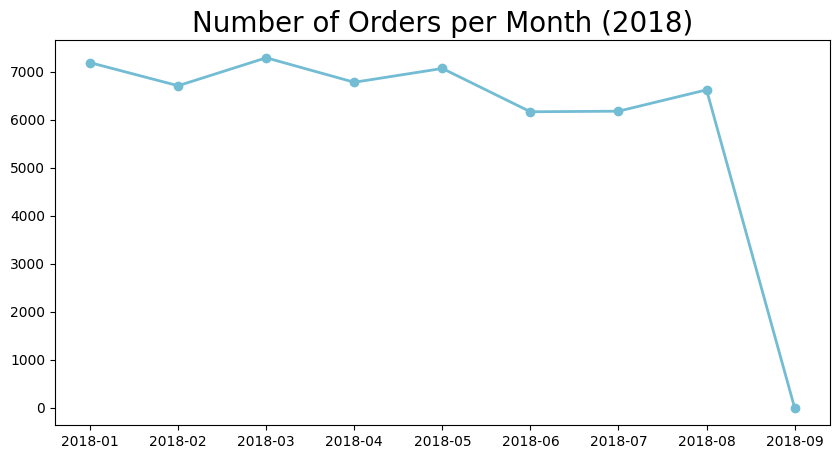

In [68]:
monthly_orders_2018_df = monthly_orders_df[monthly_orders_df['date'].str.startswith('2018')]
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_2018_df["date"], monthly_orders_2018_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [69]:
monthly_orders_2018_df.head(12)

,date,order_count
16,2018-01,7187
17,2018-02,6706
18,2018-03,7288
19,2018-04,6778
20,2018-05,7066
21,2018-06,6164
22,2018-07,6176
23,2018-08,6620
24,2018-09,1


In [70]:
# Resample data per tahun
yearly_orders_df = data_df.resample(rule='Y', on='order_approved_at').agg({
    "order_id": "nunique"
})

# Ubah format indeks menjadi tahun saja
yearly_orders_df.index = yearly_orders_df.index.strftime('%Y')

# Reset indeks untuk mengonversi indeks menjadi kolom
yearly_orders_df = yearly_orders_df.reset_index()

# Ubah nama kolom
yearly_orders_df.rename(columns={
    "order_approved_at": "year",
    "order_id": "order_count"
}, inplace=True)

# Tampilkan beberapa baris pertama dari DataFrame
yearly_orders_df.head()

,year,order_count
0,2016,322
1,2017,44973
2,2018,53986


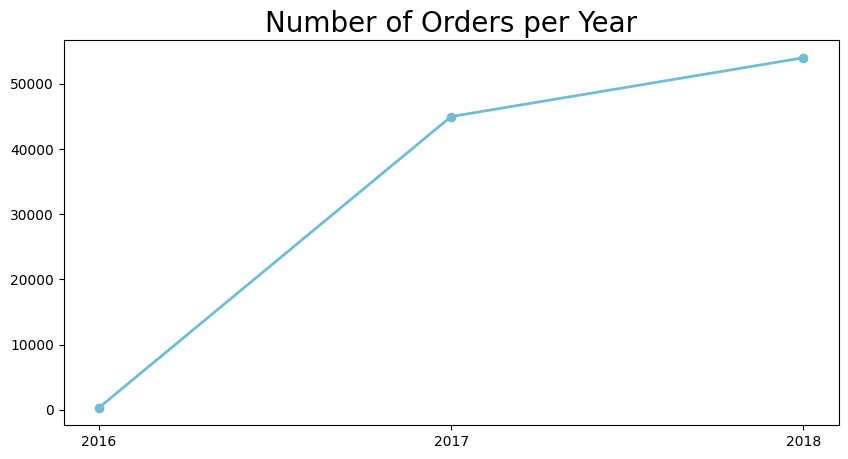

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_orders_df["year"], yearly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### **Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?**

In [72]:
sum_order_items_df = data_df.groupby("product_category_name_english")["product_id"].count().reset_index().sort_values(by="product_id", ascending=False)
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "count", "product_category_name_english": "product"})

sum_order_items_df.head()

,product,count
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


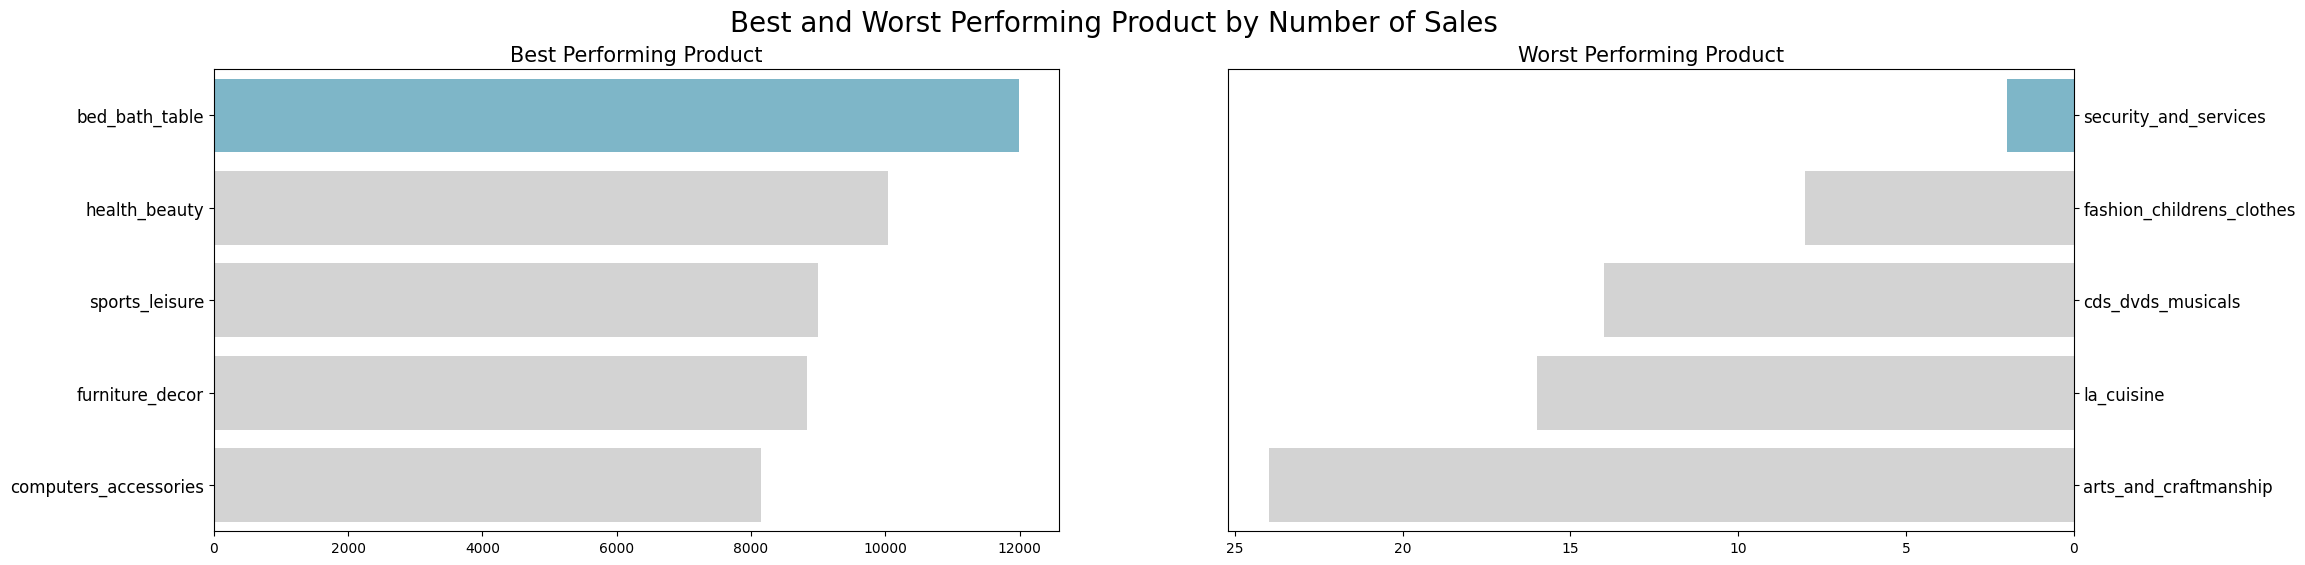

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="product", hue="product", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="count", y="product", hue="product", data=sum_order_items_df.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### **Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?**

In [74]:
other_state_geolocation = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [75]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [76]:
geolocation_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [77]:
customers_silver = customers_df.merge(geolocation_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [78]:
customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,14409,franca,SP,-20.50207,-47.396822


In [79]:
customers_silver.to_csv("geolocation.csv", index=False)

In [80]:
def plot_world_map(data):
    # Membuat peta dunia dengan projeksi PlateCarree
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Plotting data
    ax.scatter(data["geolocation_lng"].values, data["geolocation_lat"].values, color='yellow', alpha=0.3, s=1, transform=ccrs.PlateCarree())

    # Menambahkan fitur peta
    ax.coastlines()
    ax.gridlines()

    # Menampilkan peta
    plt.title("World Map")
    plt.show()


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


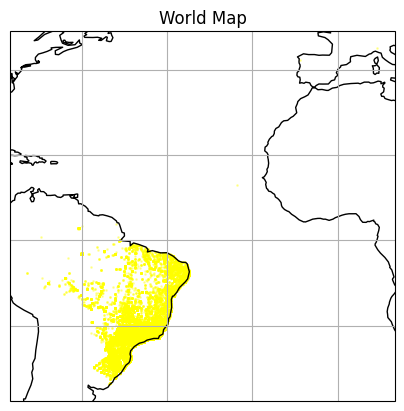

In [81]:
plot_world_map(customers_silver.drop_duplicates(subset='customer_unique_id'))


In [82]:
def plot_south_america_map(data):
    # Membuat peta dengan projeksi PlateCarree
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Mengatur batas latitude dan longitude untuk wilayah Amerika Selatan
    ax.set_extent([-90, -30, -60, 15], crs=ccrs.PlateCarree())

    # Plotting data
    ax.scatter(data["geolocation_lng"].values, data["geolocation_lat"].values, color='blue', alpha=0.3, s=1, transform=ccrs.PlateCarree())

    # Menambahkan fitur peta
    ax.coastlines()
    ax.gridlines()

    # Menampilkan peta
    plt.title("Map of South America")
    plt.show()


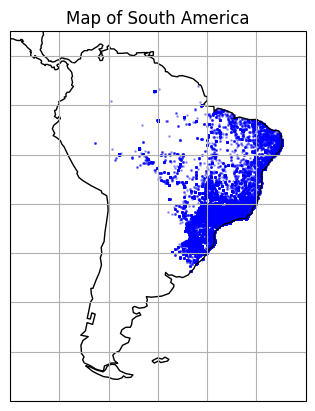

In [83]:
plot_south_america_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

### **Pertnyaan 4: Bagaimana tingkat kepuasan pelanggan?**

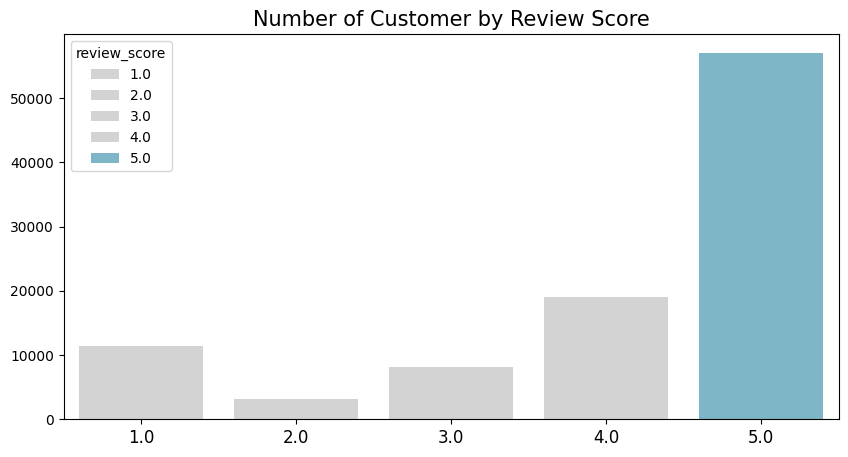

In [84]:
byreview_df = data_df.groupby(by="review_score").order_id.nunique().reset_index()
byreview_df.rename(columns={
    "order_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    y="customer_count",
    x="review_score",
    hue="review_score",
    data=byreview_df,
    palette=colors
)
plt.title("Number of Customer by Review Score", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### **Pertanyaan 5: Bagaimana pola pembayaran yang paling umum digunakan oleh pelanggan?**

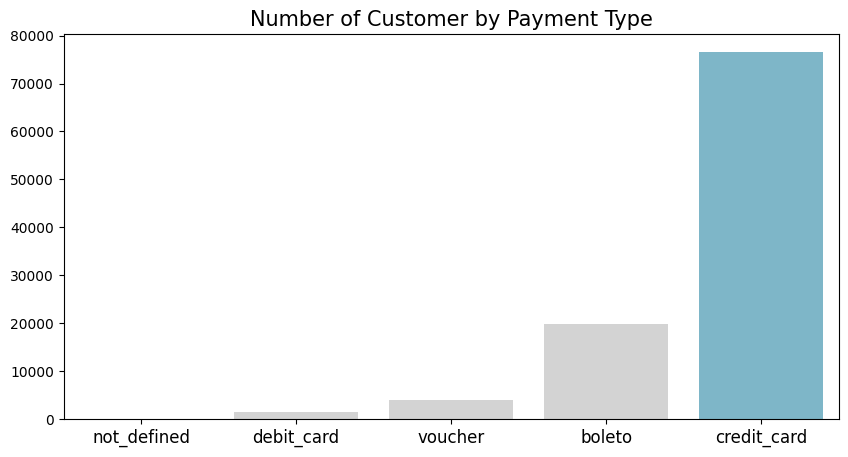

In [85]:
bypaymenttype_df = data_df.groupby(by="payment_type").order_id.nunique().reset_index()
bypaymenttype_df.rename(columns={
    "order_id": "customer_count"
}, inplace=True)
bypaymenttype_df = bypaymenttype_df.sort_values(by="customer_count", ascending=True)
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]


plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="payment_type",
    hue="payment_type",
    data=bypaymenttype_df,
    palette=colors
)
plt.title("Number of Customer by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### **Pertanyaan 6: Bagaimana performa penjualan setiap seller?**

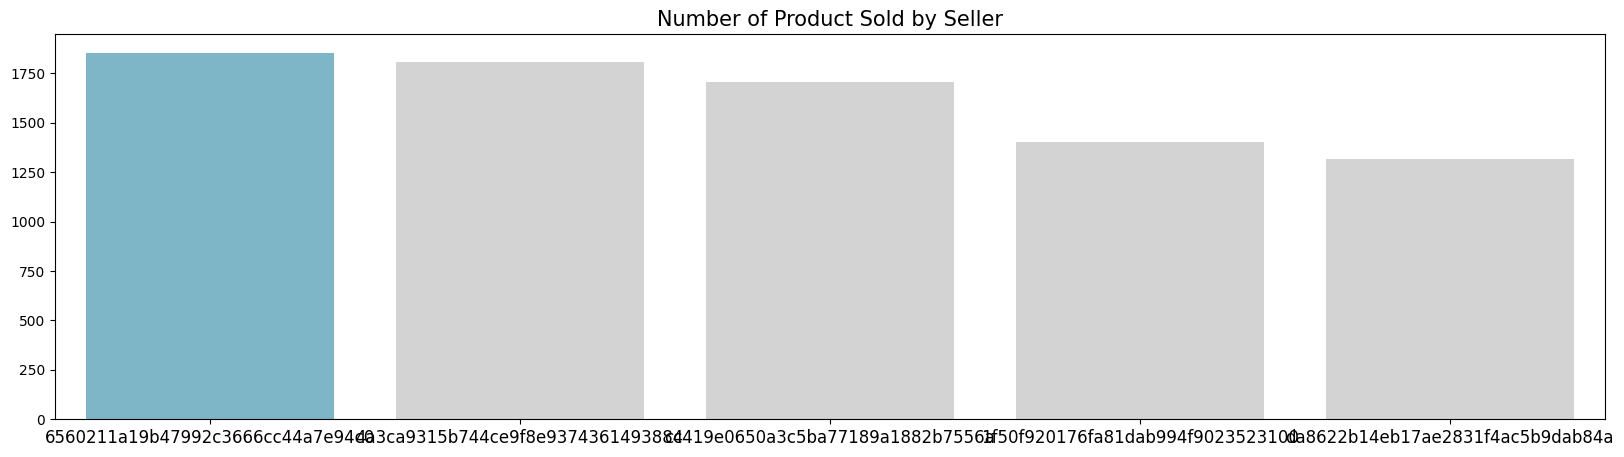

In [87]:
byseller_df = data_df.groupby(by="seller_id").order_id.nunique().reset_index()
byseller_df.rename(columns={
    "order_id": "product_count"
}, inplace=True)
byseller_df = byseller_df.sort_values(by="product_count", ascending=False).head(5)
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]


plt.figure(figsize=(20, 5))

sns.barplot(
    y="product_count",
    x="seller_id",
    hue="seller_id",
    data=byseller_df,
    palette=colors
)
plt.title("Number of Product Sold by Seller", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## **Conclusion**

*   Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

  Dilihat dari grafik, penjualan perusahaan beberapa bulan terakhir stabil diangka 6000 ke 7000 product. Penjualan terburuk ada pada bulan juni dan terbaik ada pada bulan maret. Perusahaan dapat melihat tren apa yang membuat penjualan lebih banyak pada bulan maret.


*   Produk apa yang paling banyak dan paling sedikit terjual?
Dari bar dapat dilihat bahwa penjualan product terbaik pada bed bath table dan terburuk pada security services.





*   Bagaimana demografi pelanggan yang kita miliki?

  Melihat peta persebaran pelanggan yang ada, maka dapat disimpulkan bahwa pelanggan perusahaan banyak berdomisili di Amerika selatan tepatnya di brazil.




*   Bagaimana tingkat kepuasan pelanggan?

  Dari bar yang ditampilkan dapat diambil kesimpulan bahwa 50000 lebih orderan mendapat rate 5. Namun kalau dilihat yang mendapat rate 1 juga cukup banyak yang terdiri dari 10000 lebih orderan. Ini harus menjadi catatann penting bagi perusahaan untuk lebih memberika pelayanan atau product yang lebih berkualistas.




*   Bagaimana pola pembayaran yang paling umum digunakan oleh pelanggan?

  Berdasarkan hasil visualisasi yang ada, pola pembayaran yang paling banyak digunakan oleh pelanggan adalah credit card dan sedikit yang menggunakan debit card.



*   Bagaimana performa penjualan setiap seller?

  Dari visualisasi yang ada dapat disimpulkan bahwa seller dengan id 656xxxxx berhasil menjual produk 1750 lebih. Ini bisa menjadi catatan bagi perusahaan untuk memberi reward dan pelatihan bagi seller lainnya.
